In [1]:
# Questions
# Should our target variable be penalty - 0, 1 or should it be goal, missed, saved
# we can use the % of penalty scored till now as an independent variable

### START

In [66]:
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 500)

sns.set_color_codes(palette='deep')

### Loading data

In [3]:
# Percent of penalties scored by left and right footed player
# Relation b/w gk height and goal - boxplot height y axis, x axis scored missed saved
# Shot direction vs gk height
# Favorite vs scored frequency metrics
# Location vs scored metrics
# Derby vs scored metrics

In [125]:
df = pd.read_excel("Input_Data/Data Set Penalty Excel Abgabe.xlsx", sheet_name="Only relevant 6-Alt-Data", nrows=2359)
df.columns = df.iloc[0,]
df = df[1:]
df.head(2)

,Date,penalty rejected?,Player,Nation,player position,foot,age,Age in groups,GK,Great GK?,GK already saved one,Height of GK,Height GK grouped,Team,Club/National Team,Table Position,Opponent,Opponent Table position,Favourite,Favoruite grouped,Location (H-A-N),Matchday,Round Number,competition,competition grouped,special Match?,Derby,special Match summary,Importantness Game,Importantness game grouped,Ingame-Shootout?,Actual Result*,Result including first game,Result,Lead-Deficit,NaN,Minute,Minute Pars,Number Shooter,Decider?,Shot Direction,Shot Direction 6 fields,Direction simple,Status,Schusshärte,Schuss hart ja nein,Platziert?,GK Stand,Movement?,Sort of Movement,GK Dive,tapped the ball?,J-Colour Player,J-Colour GK,right dive?,Replied??,Replied -Direction before,Replied-Status,Replied- GK dive,last penalty direction,last penalty 6 alt,last penalty,last GK dive,2-last direction,2-last penalty,2-last GK dive,Days since last penalty,in month,help month,in weeks,SH team last direction,NaN,SH Team last pen,SH last gk dive tp,SH opponent last penalty,Opponents last status,perc l,perc c,perc r,Number Penalty,Number left,Number central,Number right,NaN,NaN,NaN,NaN,NaN,perc 1,perc 2,perc 3,perc 4,perc 5,perc 6,perc 7,perc 8,perc 9,no 1,no 2,no 3,no 4,no 5,no 6,no 7,no 8,no 9,perc1,perc2,perc3,perc4,perc5,perc6,no 1,no 2,no 3,no 4,no 5,no 6,ID,SR1,SRGK1,SR2,SRGK2,SR3,SRGK3,SR4,SRGK4,SR5,SRGK5,SR6,SRGK6,MP1,MPGK1,MP2,MPGK2,MP3,MPGK3,MP4,MPGK4,MP5,MP6,MPGK6,Choice
1,2006-07-09 00:00:00,NaN,Abidal,France,DF,L,26,26,Buffon,yes,no,192,192,France,National Team,-,Italy,-,0,0,N,-,Final,WM,WM,yes,yes,yes,5,important,Shootout,3:1,-,3:1,-2,-2,-,-,6,no,7,4,Left,Goal,normal,no,no,central,no,still,Right,no,White,Gold,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,Missed,Right,1,Goal,0,0,0,1,1,0,0,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.064655,0.066174,0.037879,0.038769,0.033019,0.033795,0.168565,0.172525,0.242236,0.247927,0.184388,0.18872,0.12069,0.123525,0.159091,0.162829,0.15566,0.159318,0.039863,0.0408,0,0.02288,0.023418,4
2,2010-07-02 00:00:00,NaN,Abreu,Uruguay,ST,L,33,33,Kingson,no,no,193,193,Uruguay,National Team,-,Ghana,-,0,0,N,-,Quarter-Final,WM,WM,no,no,no,4,important,Shootout,3:2,-,3:2,+1,+1,-,-,9,yes,5,5,Center,Goal,weak,no,no,central,no,still,Left,no,Blue,Black,no,no,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,3,Missed,Left,9,Saved,0,0,0,1,0,1,0,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0.064655,0.066821,0.037879,0.039148,0.033019,0.034125,0.168565,0.174211,0.242236,0.25035,0.184388,0.190564,0.12069,0.124732,0.159091,0.16442,0.15566,0.160874,0.039863,0.041199,0,0.02288,0.023647,5


In [126]:
df.tail(2)

,Date,penalty rejected?,Player,Nation,player position,foot,age,Age in groups,GK,Great GK?,GK already saved one,Height of GK,Height GK grouped,Team,Club/National Team,Table Position,Opponent,Opponent Table position,Favourite,Favoruite grouped,Location (H-A-N),Matchday,Round Number,competition,competition grouped,special Match?,Derby,special Match summary,Importantness Game,Importantness game grouped,Ingame-Shootout?,Actual Result*,Result including first game,Result,Lead-Deficit,NaN,Minute,Minute Pars,Number Shooter,Decider?,Shot Direction,Shot Direction 6 fields,Direction simple,Status,Schusshärte,Schuss hart ja nein,Platziert?,GK Stand,Movement?,Sort of Movement,GK Dive,tapped the ball?,J-Colour Player,J-Colour GK,right dive?,Replied??,Replied -Direction before,Replied-Status,Replied- GK dive,last penalty direction,last penalty 6 alt,last penalty,last GK dive,2-last direction,2-last penalty,2-last GK dive,Days since last penalty,in month,help month,in weeks,SH team last direction,NaN,SH Team last pen,SH last gk dive tp,SH opponent last penalty,Opponents last status,perc l,perc c,perc r,Number Penalty,Number left,Number central,Number right,NaN,NaN,NaN,NaN,NaN,perc 1,perc 2,perc 3,perc 4,perc 5,perc 6,perc 7,perc 8,perc 9,no 1,no 2,no 3,no 4,no 5,no 6,no 7,no 8,no 9,perc1,perc2,perc3,perc4,perc5,perc6,no 1,no 2,no 3,no 4,no 5,no 6,ID,SR1,SRGK1,SR2,SRGK2,SR3,SRGK3,SR4,SRGK4,SR5,SRGK5,SR6,SRGK6,MP1,MPGK1,MP2,MPGK2,MP3,MPGK3,MP4,MPGK4,MP5,MP6,MPGK6,Choice
2358,2020-05-30 00:00:00,NaN,Zuber,Switzerland,MF,R,28,28,F.Müller,no,no,192,192,TSG 1899 Hoffenheim,Club,upper,FSV Mainz 05,bottom,0,0,A,29,-,League,League,no,no,no,3,normal,Ingame,0:0,-,0:0,0,0,27,2,-,no,7,4,Left,Saved,normal,no,no,central,no,still,Left,yes,Black,White,yes,no,-,-,-,7,4,Goal,Left,-,-,-,469,15,u2y,67,-,-,-,-,-,-,1,0,0,2,2,0,0,-,-,-,-,-,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,485,0.064655,0.066174,0.037879,0.038769,0.033019,0.033795,0.168565,0.172525,0.242236,0.247927,0.184388,0.18872,0.12069,0.123525,0.159091,0.162829,0.15566,0.159318,0.039863,0.0408,0,0.02288,0.023418,4
2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df['Status'].value_counts()

Goal                   1873
Saved                   351
4                       240
3                       172
Missed                  134
5                        61
2                        10
0                         3
Goals,                    2
28                        1
134                       1
17                        1
35                        1
33                        1
21                        1
0.40500424088210346       1
M                         1
107                       1
955                       1
16                        1
95                        1
158                       1
508                       1
37                        1
32                        1
Name: Status, dtype: int64

In [110]:
df1 = df.groupby(['foot', 'Status'], dropna=False).agg({'Status': 'size'}).rename(columns={'Status': '# of Penalties'})
df1 = df1.unstack("Status")
df1.columns=df1.columns.get_level_values(1)
df1.iloc[:, :] = (df1.iloc[:, :] / df1.sum(axis=1)[:, None]).mul(100).round(2)
df1 = df1.reset_index()
df1

C:\Users\Tayyab\AppData\Local\Temp/ipykernel_29928/3098624097.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df1.iloc[:, :] = (df1.iloc[:, :] / df1.sum(axis=1)[:, None]).mul(100).round(2)


Status,foot,0,0.40500424088210346,2,16,32,37,95,107,158,508,955,Goal,"Goals,",Missed,Saved,NaN
0,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.20,NaN,6.74,16.06,NaN
2,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.16,NaN,5.34,14.50,NaN
3,NaN,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,NaN,NaN,52.0


In [90]:
df['Height of GK'] = df['Height of GK'].replace("?", np.nan).astype(float)

<AxesSubplot:xlabel='Status', ylabel='Height of GK'>

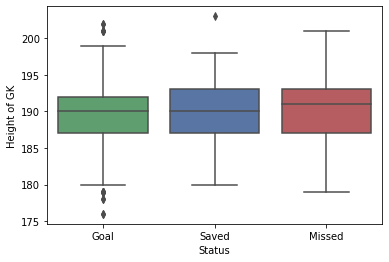

In [103]:
sns.boxplot(x='Status', y='Height of GK', data=df, palette=['g', 'b', 'r'])

In [ ]:
sns.boxplot(x='Status', y='Height of GK', data=df, palette=['g', 'b', 'r'])

In [11]:
# df.groupby(['Favourite', 'Favoruite grouped']).size()

In [14]:
df['Derby'].value_counts()

no     2054
yes     327
Name: Derby, dtype: int64

In [8]:
df['Favoruite grouped'].value_counts()

0           1453
+0.5         380
0            247
Underdog     113
+2            99
+1            90
Name: Favoruite grouped, dtype: int64

In [12]:
df['Direction simple'].value_counts(normalize=True)

Left      0.471033
Right     0.404282
Center    0.124685
Name: Direction simple, dtype: float64

In [11]:
df['Shot Direction'].value_counts()

7    731
9    637
4    246
6    198
1    145
3    128
5    113
8    102
2     82
Name: Shot Direction, dtype: int64

In [14]:
df.groupby(['Direction simple', 'Shot Direction']).size()

Direction simple  Shot Direction
Center            2                  82
                  5                 113
                  8                 102
Left              1                 145
                  4                 246
                  7                 731
Right             3                 128
                  6                 198
                  9                 637
dtype: int64

### Distribution of data acc to year

In [7]:
df["Year"] = pd.to_datetime(df['Date']).dt.year
round(df["Year"].value_counts(normalize=True) * 100, 2)

2019    15.62
2020    14.90
2018    12.17
2021    10.54
2016     8.31
2017     6.59
2014     5.42
2015     5.42
2012     4.58
2013     3.74
2010     3.44
2011     2.43
2006     2.35
2008     1.81
2009     1.39
2007     0.97
2005     0.21
2004     0.13
Name: Year, dtype: float64

### # of penalties scored by every player in each year

In [8]:
player_stats = df.groupby(['Year', 'Player', 'Status'], as_index=False, dropna=False).size().sort_values(["Year", "Player"], ascending=[False, False])
player_stats = player_stats.rename(columns={"size": "# of shots"})
player_stats["Total penalties"] = player_stats.groupby(['Year', 'Player'], dropna=False)["# of shots"].transform("sum")
player_stats['% target'] = round(player_stats['# of shots'] / player_stats['Total penalties'] * 100, 2)
player_stats[player_stats['Status'] == "Goal"]

,Year,Player,Status,# of shots,Total penalties,% target
1179,2021,Özcan,Goal,1,1,100.00
1177,2021,Wekesser,Goal,1,1,100.00
1174,2021,Weghorst,Goal,1,3,33.33
1173,2021,Waris,Goal,1,1,100.00
1172,2021,Wamangituka,Goal,1,1,100.00
...,...,...,...,...,...,...
4,2005,Ronaldo,Goal,2,2,100.00
3,2005,Messi,Goal,2,2,100.00
2,2005,Agüero,Goal,1,1,100.00
1,2004,Ronaldo,Goal,1,1,100.00


In [16]:
player_stats = df.groupby(['Player', 'Status'], as_index=False, dropna=False).size().sort_values(["Player"], ascending=[False])
player_stats = player_stats.rename(columns={"size": "# of shots"})
player_stats["Total penalties"] = player_stats.groupby(['Player'], dropna=False)["# of shots"].transform("sum")
player_stats['% target'] = round(player_stats['# of shots'] / player_stats['Total penalties'] * 100, 2)
player_stats[player_stats['Status'] == "Goal"]

,Player,Status,# of shots,Total penalties,% target
644,Özil,Goal,1,3,33.33
643,Özcan,Goal,2,2,100.00
642,van Persie,Goal,2,2,100.00
641,dè Guzmán,Goal,1,1,100.00
640,de Sciglio,Goal,1,1,100.00
636,Zuber,Goal,1,2,50.00
634,Zidane,Goal,2,2,100.00
632,Zeitz,Goal,1,1,100.00
627,Yakin,Goal,1,1,100.00
624,Xabi Alonso,Goal,1,3,33.33
